# Interpolación

### Interpolar con 10 puntos generados de la función de Runge $f(x) = \frac{1}{1+25x^2}$ en el intervalo $[-1,1]$ equidistantes.

In [1]:
import wget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.interpolate import interp1d

In [2]:
## Definimos la función de Runge con un lambda statement
runge = lambda x: 1/(1+25*x**2)
np.random.seed(1983)
x = np.linspace(-1 ,1 ,10)
y = runge(x)

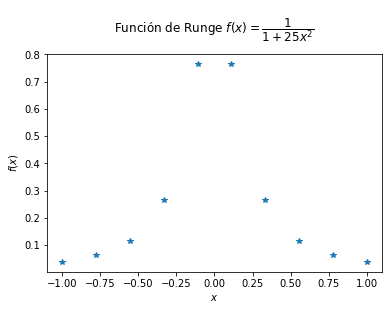

In [3]:
%matplotlib inline
plt.plot(x,y,'*')
plt.title("Función de Runge $f(x)=\dfrac{1}{1+25x^2}$\n")
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

In [4]:
## Usamos la función polyfit de numpy para obtener los coeficientes de nuestro plonomio, el grado será del número de nuestros puntos -1 y graficamos
n = 10000
coeff = np.polyfit(x,y,len(x)-1)
xpoly = np.linspace(min(x),max(x), n)
ypoly = np.polyval(coeff,xpoly)

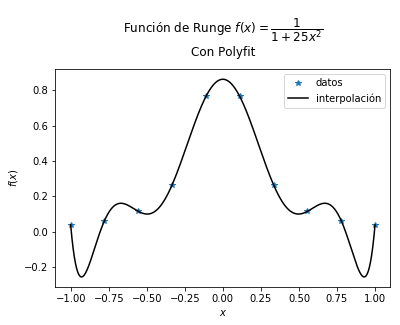

In [5]:
%matplotlib inline
plt.title("Función de Runge $f(x)=\dfrac{1}{1+25x^2}$\nCon Polyfit\n")
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.plot(x, y, '*', xpoly, ypoly, 'k-')
plt.legend(['datos','interpolación'], loc='best')
plt.show()

In [6]:
## Usamos la librería interp1d de python para obtener los splines
spline = interp1d(x, y, kind = 'cubic')
xspln = np.linspace(min(x),max(x), n)
yspln = spline(xspln)

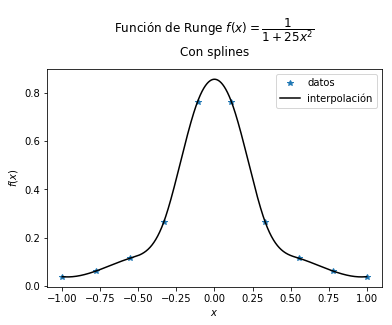

In [7]:
%matplotlib inline
plt.title("Función de Runge $f(x)=\dfrac{1}{1+25x^2}$\nCon splines\n")
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.plot(x, y, '*', xspln, yspln, 'k-')
plt.legend(['datos','interpolación'], loc='best')
plt.show()

### Interpolación de una imágen con una curva paramétrica.

100% [............................................................................] 511394 / 511394

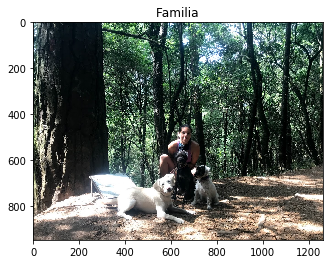

In [8]:
%matplotlib inline
wget.download('http://drive.google.com/uc?export=view&id=1FUoz4mlKp1WISivkqHYrRzHzV5BgeC-M','fam.jpg')
img=plt.imread('fam.jpg')
plt.imshow(img)
plt.title('Familia')
plt.show()

* Debido a las complicaciones con la interactividad entre matplot y jupyter lab, este ejercicio fue realizado directamente en el shell de python con los pasos vistos durante la clase.

  Únicamente se muesta el códigop y resultado de la interpolación de la imágen.

In [ ]:
fig, ax = plt.subplots()
pos = []
def onclick(event):
    pos.append([event.xdata,event.ydata])
fig.canvas.mpl_connect('button_press_event', onclick)
plt.title('Familia')
plt.imshow(img)
pos_array = np.array(pos)
x = pos_array[:,0]
y = pos_array[:,1]
t = np.linspace(0,1, len(x))
pw_spline_x = interp1d(t, x, kind = 'cubic') #spline piecewise 
pw_spline_y = interp1d(t,y, kind = 'cubic') #spline piecewise
neval = 100
teval = np.linspace(min(t),max(t), neval)
xeval = pw_spline_x(teval)
yeval = pw_spline_y(teval)
window_y = 50
window_x = 500    
x_min = np.min(x)
y_min = np.min(y)
x_max = np.max(x)
y_max = np.max(y)
fig, ax = plt.subplots()
ax.plot(xeval,yeval)
ax.set_ylim(np.max(y)+window_y,np.min(y)-window_y)
plt.xlim(np.min(x)-window_x,np.max(x)+window_x)
plt.title('Familia con interpolación vía curva paramétrica')
plt.show()

<img src="http://drive.google.com/uc?export=view&id=1JnKHEtDQbORofZMTmdpemXZtrUqvTQ5v" width="500">

### Reconstrucción de una imágen usando SVD

Usando 10, 20, 30, 40 y 50 número de vectores singulares izquierdos, derechos y valores singulares

In [9]:
img=plt.imread('luca.jpg')
img = img[:,:,0]
U,S,V_T = np.linalg.svd(img, full_matrices=False)
img_svd = (U*S)@V_T
shape_img = img_svd.shape

In [10]:
def sum_USV_T(shape, i, U, S, V_T):
    """
     Use the values returned by funtion np.linalg.svd to return a vector with i numbers of left and right singular
     vector(s) and i singular value.
    Args:
        shape (tuple): shape of the image as SVD.
        i (int): number of SVD to be truncated
        U (array): Unitary array(s)
        S (array): Vector(s) with the singular values, within each vector sorted in descending order
        V_T (array): Vector Transposed
    Returns:
        img_svd_ (array): sum of the numbers of truncations.
    """
    if i < 2:
        return np.outer((U[:,1]*S[1]),V_T[1,:])
    else:
        img_svd_ = np.empty(shape)
        img_svd_ = np.empty([635,476])
        for i in (n+1 for n in range(n)):
            img_svd_ += np.outer((U[:,i]*S[i]),V_T[i,:])
        return img_svd_

In [18]:
n = 1
img_svd_1 = sum_USV_T(shape_img, n, U, S, V_T)
n = 10
img_svd_10 = sum_USV_T(shape_img, n, U, S, V_T)
n = 20
img_svd_20 = sum_USV_T(shape_img, n, U, S, V_T)
n = 30
img_svd_30 = sum_USV_T(shape_img, n, U, S, V_T)
n = 40
img_svd_40 = sum_USV_T(shape_img, n, U, S, V_T)
n = 50
img_svd_50 = sum_USV_T(shape_img, n, U, S, V_T)
n = 100
img_svd_100 = sum_USV_T(shape_img, n, U, S, V_T)
n = 475
img_svd_475 = sum_USV_T(shape_img, n, U, S, V_T)

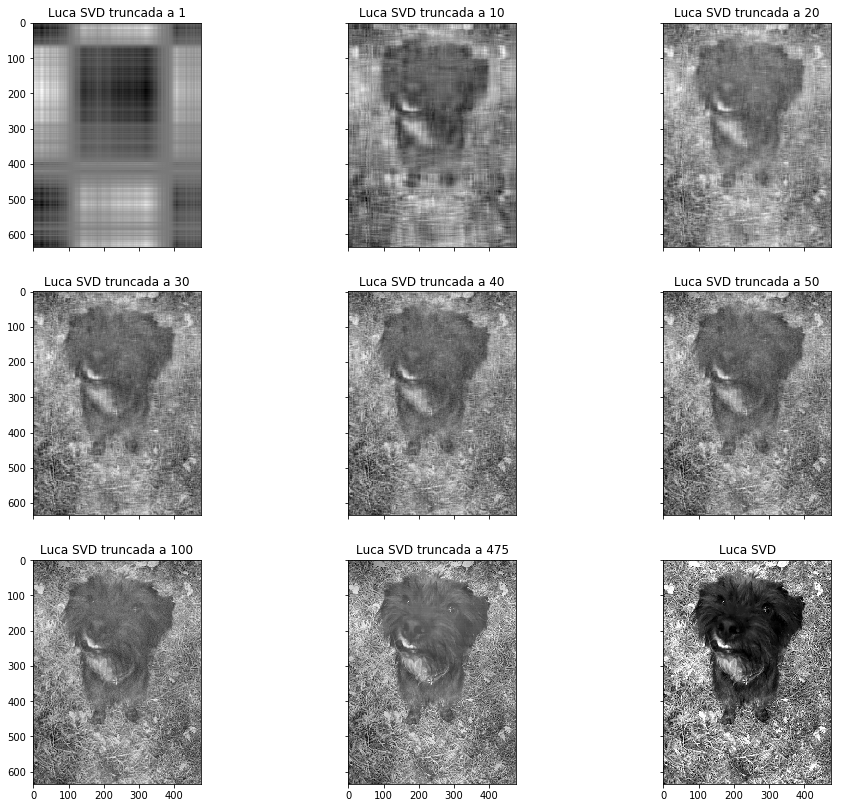

In [21]:
%matplotlib inline
f, ax = plt.subplots(3,3, sharex='col', sharey='row',figsize=(16, 14))
ax[0,0].imshow(img_svd_1, cmap='gray')
ax[0,0].set_title('Luca SVD truncada a 1')
ax[0,1].imshow(img_svd_10, cmap='gray')
ax[0,1].set_title('Luca SVD truncada a 10')
ax[0,2].imshow(img_svd_20, cmap='gray')
ax[0,2].set_title('Luca SVD truncada a 20')
ax[1,0].imshow(img_svd_30, cmap='gray')
ax[1,0].set_title('Luca SVD truncada a 30')
ax[1,1].imshow(img_svd_40, cmap='gray')
ax[1,1].set_title('Luca SVD truncada a 40')
ax[1,2].imshow(img_svd_50, cmap='gray')
ax[1,2].set_title('Luca SVD truncada a 50')
ax[2,0].imshow(img_svd_100, cmap='gray')
ax[2,0].set_title('Luca SVD truncada a 100')
ax[2,1].imshow(img_svd_475, cmap='gray')
ax[2,1].set_title('Luca SVD truncada a 475')
ax[2,2].imshow(img_svd, cmap='gray')
ax[2,2].set_title('Luca SVD')
plt.show()